In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset00.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset02.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset01.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/README.md
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset04.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset03.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset05.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset09.jsonl
/kaggle/input/opengpttext/opengpttext-original/chatgpt/urlsf_subset06.jsonl
/kaggle/input/opengpttext/opengpttext-original/openweb/README.md
/kaggle/input/opengpttext/opengpttext-clean/chatgpt/urlsf_subset00.jsonl
/kaggle/input/opengpttext/opengpttext-clean/chatgpt/urlsf_subset02.jsonl
/kaggle/input/opengpttext/opengpttext-clean/chatgpt/urlsf_subset01.jsonl
/kaggle/input/opengpttext/opengpttext-clean

In [23]:
import os
import json
import tqdm


folder_path = '/kaggle/input/opengpttext/opengpttext-clean/'
open_web_folder = 'openweb'
chatgpt_folder = 'chatgpt'

open_web_list = []  
chatgpt_list = []  


open_web_path = os.path.join(folder_path, open_web_folder)
for filename in tqdm.tqdm(os.listdir(open_web_path)):
    file_path = os.path.join(open_web_path, filename)
    if 'README.md' not in file_path:
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                open_web_list.append(data)


                chatgpt_path = os.path.join(folder_path, chatgpt_folder)
for filename in tqdm.tqdm(os.listdir(chatgpt_path)):
    file_path = os.path.join(chatgpt_path, filename)
    if 'README.md' not in file_path:
        with open(file_path, 'r') as file:
            for line in file:
                data = json.loads(line)
                chatgpt_list.append(data)

100%|██████████| 9/9 [00:00<00:00, 10.54it/s]


In [24]:
len(open_web_list)

29142

In [25]:
len(chatgpt_list)

29395

In [26]:
open_web_list[0]

{'uid': '[urlsf_subset00]-[83]',
 'text': 'Check current weather conditions\nIt\'s going to be cold around Western Washington for the next couple of days, but the National Weather Service\'s Mike McFarland says it\'s par for the course.\n"We\'ve had a couple of mild winters so we\'re maybe getting back to normal for a change," McFarland said. "If we had El Nino, then a lot of times you get a mild winter. With neutral conditions or a weak La Nina like we have then you have a good chance for a normal winter and a couple of cold snaps."\nIn defense of meteorologists: Don\'t get mad at forecasts\nThe National Weather Service says to expect a few more days of freezing temperatures, during which Seattle may not get above freezing. That hasn\'t happened since December 2008. Highs will be in the 20s to low 30s and lows in the teens and 20s, possibly through Thursday.\nIn areas north of Seattle, including Whatcom and Skagit counties, temperatures are likely to be even colder, especially with th

In [27]:
chatgpt_list[0]

{'uid': '[urlsf_subset00]-[83]',
 'text': 'The National Weather Service\'s Mike McFarland advises that Western Washington will be experiencing cold weather for the next few days, which is normal after a couple of mild winters. El Nino conditions typically result in mild winters; however, the weak La Nina, neutral conditions may bring about normal winters and cold snaps.\nDespite Seattle\'s anticipated freezing temperatures, with highs ranging from 20s to low 30s, McFarland says the temperatures will gradually increase as the week continues. In areas north of Seattle, including Whatcom and Skagit counties, temperatures could drop even further with the wind chill factor. The Weather Service has issued a Wind Advisory for Monday morning, noting that sustained winds of 20 to 35 mph and gusts as high as 50 mph are making for wind chill readings in the single digits.\nSeattle may see some rain and snow later in the week, but moisture is expected to be limited. The city is expected to stay mo

In [28]:
import pandas as pd

data_dict = {'text':[], 'label':[]}

for data in open_web_list:
    text = data['text']
    data_dict['text'] += [text]
    data_dict['label'] += [0]

for data in chatgpt_list:
    text = data['text']
    data_dict['text'] += [text]
    data_dict['label'] += [1]
    
df = pd.DataFrame(data_dict)

In [29]:
df

,text,label
0,Check current weather conditions\nIt's going t...,0
1,"On Thursday, the president of the United State...",0
2,Curitiba -\nEl delantero Enner Valencia marco ...,0
3,Getting started\n(I'm using Windows 10)\nAfter...,0
4,"Today, Mexico's newest data retention law ente...",0
...,...,...
58532,A proposed addiction treatment center worth $1...,1
58533,"At $10.33 an hour, I struggle to support my so...",1
58534,A study has found that when older honeybees ta...,1
58535,The website SaveThePlanetProtest.com has issue...,1


In [30]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


df_shuffled = shuffle(df, random_state=42)

train_df, test_df = train_test_split(df_shuffled, test_size=0.2, random_state=42)

print("Shuffled DataFrame:")
print(df_shuffled)
print("\nTrain DataFrame:")
print(train_df)
print("\nTest DataFrame:")
print(test_df)

Shuffled DataFrame:
                                                    text  label
10393  Time famously bestows its awards not according...      0
1246   Caspian tern (Hydroprogne caspia). Collected f...      0
46263  Racial differences in wealth, rather than educ...      1
5970   Yo yo yo! Chozen be in the hizzy or off the hi...      0
13511  Timofey Mozgov has blogged at Sports.ru after ...      0
...                                                  ...    ...
54343  Porsche teammates Mark Webber, Brendon Hartley...      1
38158  A group of scientists, including Professors Lo...      1
860    Bryan Trottier's name has appeared on the Stan...      0
15795  Former head writer for WWE, WCW & TNA Wrestlin...      0
56422  According to Joey Harrington, players who have...      1

[58537 rows x 2 columns]

Train DataFrame:
                                                    text  label
48768  Donald Trump started a rally in Warwick, Rhode...      1
43705  In 2015, two jihadi militants att

In [ ]:
!pip install datasets

In [31]:
import datasets

train = datasets.Dataset.from_dict(train_df)
test = datasets.Dataset.from_dict(test_df)
new_dataset = datasets.DatasetDict()
new_dataset['train'] = train
new_dataset['test'] = test

In [32]:
new_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 46829
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 11708
    })
})

In [36]:
from transformers import AutoModel
import torch


model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [37]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [38]:
def tokenize(batch):
    return tokenizer(batch["text"], padding='max_length', truncation=True, max_length=512)

In [39]:
text_encoded = new_dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [40]:
text_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 46829
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 11708
    })
})

In [41]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
        .from_pretrained(model_ckpt, num_labels=num_labels)
        .to(device))

In [42]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [43]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(text_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"
)

In [44]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=text_encoded['train'],
    eval_dataset=text_encoded['test'],
    tokenizer=tokenizer,
)

trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.098128,0.966519,0.966490
2,0.087600,0.124421,0.964469,0.964428


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=1464, training_loss=0.08754228909062273, metrics={'train_runtime': 2684.1298, 'train_samples_per_second': 34.893, 'train_steps_per_second': 0.545, 'total_flos': 1.2406631623323648e+16, 'train_loss': 0.08754228909062273, 'epoch': 2.0})

In [45]:
preds_output = trainer.predict(text_encoded["test"])

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [46]:
preds_output.metrics

{'test_loss': 0.1244213655591011,
 'test_accuracy': 0.9644687393235395,
 'test_f1': 0.9644282184531999,
 'test_runtime': 119.4351,
 'test_samples_per_second': 98.028,
 'test_steps_per_second': 1.532}

In [47]:
preds_output

PredictionOutput(predictions=array([[ 3.0636945, -2.5337644],
       [-3.622642 ,  3.3971045],
       [ 3.5823424, -3.142302 ],
       ...,
       [-3.6214776,  3.6701307],
       [ 3.2476382, -2.662452 ],
       [ 3.2273927, -2.564885 ]], dtype=float32), label_ids=array([0, 1, 0, ..., 1, 0, 0]), metrics={'test_loss': 0.1244213655591011, 'test_accuracy': 0.9644687393235395, 'test_f1': 0.9644282184531999, 'test_runtime': 119.4351, 'test_samples_per_second': 98.028, 'test_steps_per_second': 1.532})

In [48]:
y_test = np.array(text_encoded["test"]["label"])
y_test

array([0, 1, 0, ..., 1, 0, 0])

In [49]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_preds

array([0, 1, 0, ..., 1, 0, 0])

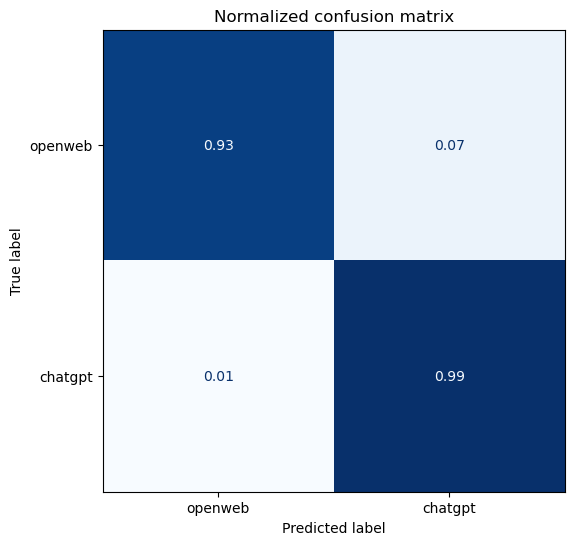

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_pred, y_true, labels):
    cm = confusion_matrix(y_true, y_pred, normalize="true")
    _, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_test, ['openweb', 'chatgpt'])